In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/35_0_2_20170116182734834.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/76_0_0_20170104213515132.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/36_1_0_20170116165722892.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/34_0_3_20170119200815948.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/18_1_0_20170104022856102.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/40_1_1_20170113011948248.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/45_0_0_20170117180013541.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/26_1_1_20170117153641469.jpg.c

In [3]:
!pip install opencv-python-headless


In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from matplotlib import pyplot as plt


In [5]:
DATASET_DIR = "/kaggle/input/utkface-new/UTKFace"  # UPDATE THIS

images = []
ages = []
hair_lengths = []

def determine_hair_length(img):
    # Simple rule: If face occupies small height of image → assume long hair
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_height = gray.shape[0]
    if face_height >= 60:
        return 1  # long hair
    else:
        return 0  # short hair

for img_name in os.listdir(DATASET_DIR)[:5000]:  # Load first 5k images
    parts = img_name.split('_')
    try:
        age = int(parts[0])
        img_path = os.path.join(DATASET_DIR, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))
        hair_length = determine_hair_length(img)

        images.append(img)
        ages.append(age)
        hair_lengths.append(hair_length)
    except:
        continue

X = np.array(images) / 255.0
y_age = np.array(ages)
y_hair = np.array(hair_lengths)

In [6]:
X_train, X_test, age_train, age_test, hair_train, hair_test = train_test_split(
    X, y_age, y_hair, test_size=0.2, random_state=42)


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [4]:
!pip install gradio --quiet
import gradio as gr
from PIL import Image


In [9]:
inputs = Input(shape=(64, 64, 3))

x = Conv2D(32, (3,3), activation='relu')(inputs)
x = MaxPooling2D()(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D()(x)
x = Flatten()(x)

age_output = Dense(1, name='age')(x)
hair_output = Dense(1, activation='sigmoid', name='hair')(x)

model = Model(inputs=inputs, outputs=[age_output, hair_output])

model.compile(optimizer=Adam(),
              loss={'age': 'mse', 'hair': 'binary_crossentropy'},
              metrics={'age': 'mae', 'hair': 'accuracy'})

model.summary()


2025-07-19 04:32:43.212128: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 62, 62,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 31, 31,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 29, 29,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 14, 14,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 12544)     │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age (Dense)         │ (None, 1)         │     12,545 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hair (Dense)        │ (None, 1)         │     12,545 │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 44,482 (173.76 KB)

 Trainable params: 44,482 (173.76 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X_train, 
                    {'age': age_train, 'hair': hair_train},
                    validation_split=0.1,
                    epochs=10,
                    batch_size=32)


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - age_loss: 677.0812 - age_mae: 20.3611 - hair_accuracy: 0.9534 - hair_loss: 0.0644 - loss: 677.1494 - val_age_loss: 377.1310 - val_age_mae: 14.5579 - val_hair_accuracy: 1.0000 - val_hair_loss: 5.0336e-11 - val_loss: 376.7669
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - age_loss: 438.0608 - age_mae: 16.2031 - hair_accuracy: 1.0000 - hair_loss: 1.7230e-10 - loss: 438.0504 - val_age_loss: 397.8549 - val_age_mae: 14.2237 - val_hair_accuracy: 1.0000 - val_hair_loss: 1.2239e-10 - val_loss: 396.0833
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - age_loss: 393.8811 - age_mae: 15.3768 - hair_accuracy: 1.0000 - hair_loss: 3.4193e-11 - loss: 393.8734 - val_age_loss: 360.5693 - val_age_mae: 15.8037 - val_hair_accuracy: 1.0000 - val_hair_loss: 9.8009e-15 - val_loss: 359.1341
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - age_loss: 360.4906 - age_mae: 14.7792 - hair_accuracy: 1.0000 - hair_loss: 3.2743e-13 - loss: 360.

In [11]:
# Pick one test image
test_image = X_test[0]

# Reshape to match model input
img = np.expand_dims(test_image, axis=0)

# Make prediction
pred_age, pred_hair = model.predict(img)

# Show results
print(f"Predicted Age: {int(pred_age[0][0])}")
print(f"Predicted Hair Length: {'Long Hair' if pred_hair[0][0] > 0.5 else 'Short Hair'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted Age: 47
Predicted Hair Length: Long Hair


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


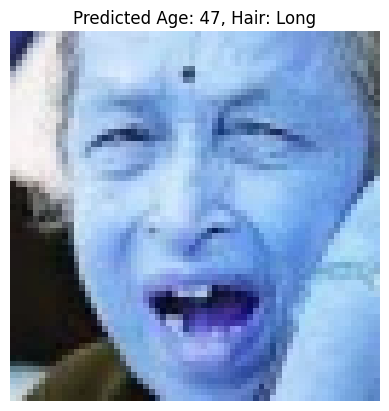

In [12]:
# Run predictions on the full test set
age_preds, hair_preds = model.predict(X_test)

import matplotlib.pyplot as plt

i = 0
plt.imshow(X_test[i])
plt.axis('off')
plt.title(f"Predicted Age: {int(age_preds[i][0])}, Hair: {'Long' if hair_preds[i][0]>0.5 else 'Short'}")
plt.show()


In [13]:
model.save("final_age_hair_model.h5")


gender

In [5]:
dataset_path = "/kaggle/input/utkface-new/UTKFace"  # UPDATE THIS

images = []
genders = []

for filename in os.listdir(dataset_path):
    try:
        age, gender, race, _ = filename.split("_")
        gender = int(gender)  # 0 = Male, 1 = Female

        img_path = os.path.join(dataset_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))
        images.append(img)
        genders.append(gender)
    except:
        continue

X = np.array(images) / 255.0  # Normalize
y = np.array(genders)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-19 05:16:41.156924: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=32)


Epoch 1/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 45s 81ms/step - accuracy: 0.7351 - loss: 0.5007 - val_accuracy: 0.8577 - val_loss: 0.3182
Epoch 2/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 43s 81ms/step - accuracy: 0.8674 - loss: 0.3039 - val_accuracy: 0.8672 - val_loss: 0.2907
Epoch 3/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 43s 80ms/step - accuracy: 0.8867 - loss: 0.2701 - val_accuracy: 0.8824 - val_loss: 0.2697
Epoch 4/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 43s 80ms/step - accuracy: 0.9018 - loss: 0.2343 - val_accuracy: 0.8803 - val_loss: 0.2721
Epoch 5/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 44s 81ms/step - accuracy: 0.9152 - loss: 0.2150 - val_accuracy: 0.8925 - val_loss: 0.2597
Epoch 6/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 43s 80ms/step - accuracy: 0.9183 - loss: 0.1977 - val_accuracy: 0.8935 - val_loss: 0.2744
Epoch 7/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 43s 80ms/step - accuracy: 0.9301 - loss: 0.1761 - val_accuracy: 0.8930 - val_loss: 0.2580
Epoch 8/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 43s 81ms/step - accuracy: 0.9437 - loss: 0.1499 - 

In [9]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9003 - loss: 0.2681
Test Accuracy: 90.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


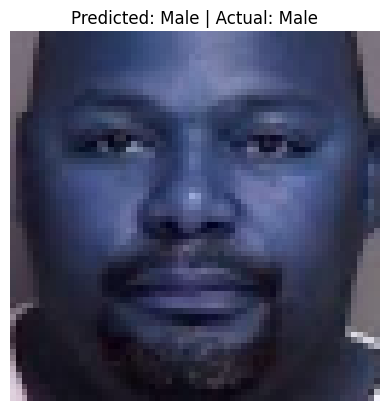

In [10]:
i = 1  # Index of test image
img = X_test[i]
label = y_test[i]

pred = model.predict(np.expand_dims(img, axis=0))[0][0]
gender = "Female" if pred > 0.5 else "Male"
true_gender = "Female" if label == 1 else "Male"

plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {gender} | Actual: {true_gender}")
plt.show()


In [11]:
model.save("gender_model.h5")
